In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


--2019-10-25 06:41:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [application/x-httpd-php]
Сохранение в: «adult.data»

adult.data          100%[===================>]   3,79M   439KB/s    за 16s     

2019-10-25 06:41:17 (246 KB/s) - «adult.data» сохранён [3974305/3974305]



In [6]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [7]:
df = pd.read_csv("./adult.data", names=cols)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Step 1. How many males and females are there?

In [9]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

### 2.  What is the mean male age?

In [10]:
df.groupby('sex').age.mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

### 3.  What is the proportion of the US citizens?

In [11]:
df['native-country'].value_counts(normalize=True)[' United-States']

0.895857006848684

### 4. Plot the distribution of people’s education as a bar plot.

Text(0, 0.5, 'Number')

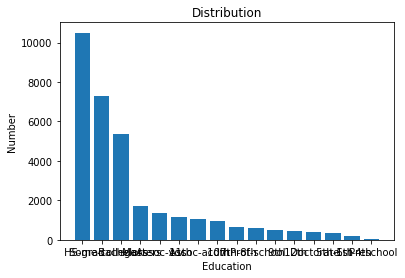

In [13]:
plt.bar(df['education'].value_counts().index,
        df['education'].value_counts().values
       )
plt.title("Distribution")
plt.xlabel("Education")
plt.ylabel("Number")

### 5.  What is the mean and standard deviation of the ”final weight” for divorced people?

In [14]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].mean()

185802.79045689848

In [15]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].std()

105646.78945933603

### 6.  Is it true that the people who receive over 50k are mostly highly educated?

In [16]:
df[(df['result'] == ' >50K') &
   ((df['education'] == ' Bachelors') |
   (df['education'] == '  Masters') |
   (df['education'] == ' Doctorate'))
  ].shape[0]


2527

In [17]:
df[df['result'] == ' >50K'].shape[0]

7841

#### It's not true

### 7.  What is the maximum male and female age for each race?

In [19]:
df.groupby(['race', 'sex'])['age'].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8.  The people from which countries work as farmers/fishers?

In [20]:
df[df['occupation'] == ' Farming-fishing']['native-country'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

### 9.  Consider  the  ratio  of  the  number  of  1)  male  bachelors  to  male  masters,  and  2)  femalebachelors to female masters.  Which one is higher?

In [22]:
float(df[(df['education'] == ' Bachelors') & (df['sex'] == ' Male')].shape[0])/float(df[(df['education'] == ' Masters') & (df['sex'] == ' Male')].shape[0])

3.14743049705139

In [23]:
float(df[(df['education'] == ' Bachelors') & (df['sex'] == ' Female')].shape[0])/float(df[(df['education'] == ' Masters') & (df['sex'] == ' Female')].shape[0])

3.0205223880597014

### 10.  What is the largest number of hours a person works a week?  How many people who workthis number of hours are there?  What is their income?

In [24]:
df['hours-per-week'].max()

99

In [25]:
df[df['hours-per-week'] == df['hours-per-week'].max()].shape[0]

85

In [26]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['result']

935        >50K
1172       >50K
1887       >50K
3578       >50K
4086      <=50K
4308      <=50K
4441       >50K
5376      <=50K
5432      <=50K
6618      <=50K
6898      <=50K
8072      <=50K
8393       >50K
8654      <=50K
8796       >50K
9811      <=50K
9831      <=50K
10143     <=50K
10266     <=50K
10468     <=50K
10986      >50K
11833     <=50K
12209     <=50K
12625     <=50K
12788     <=50K
13558      >50K
13580     <=50K
13617     <=50K
13858      >50K
14593     <=50K
          ...  
23226     <=50K
23398     <=50K
23649      >50K
23830     <=50K
24483      >50K
25354     <=50K
25713      >50K
25806     <=50K
25831      >50K
25986     <=50K
26250     <=50K
26596      >50K
26638     <=50K
26858     <=50K
27222     <=50K
27764     <=50K
27809     <=50K
28112     <=50K
29187      >50K
29751     <=50K
29989      >50K
30036      >50K
30610      >50K
30754     <=50K
30766      >50K
30992     <=50K
31681      >50K
31699     <=50K
32469     <=50K
32531     <=50K
Name: result, Length: 85